Проводим подготовку

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import scipy

duration = 5  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц
num_samples = int(duration * sample_rate)

Также взаранее подготовим белый шум

In [2]:
def gen_white_noise():
    return np.random.random(num_samples)

#1 Генерация розового шума

In [14]:
def gen_pink_noise():
    white = gen_white_noise()
    pink = np.fft.rfft(white)
    pink = pink / np.sqrt(np.arange(1, len(pink)+1))
    return np.fft.irfft(pink)
pink_noise = gen_pink_noise()

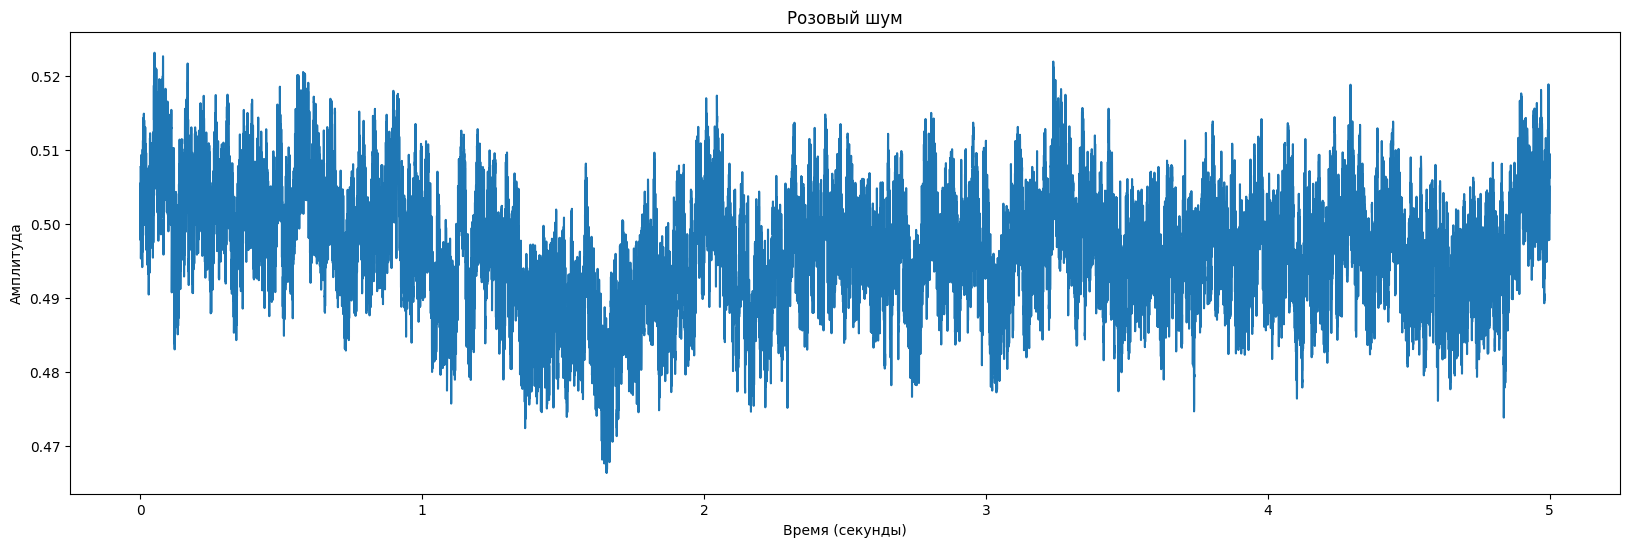

In [15]:
#визуализация
time_axis = np.linspace(0, duration, len(pink_noise)) 
plt.figure(figsize=(20, 6))  
plt.plot(time_axis, pink_noise)

plt.title('Розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.show()

In [16]:
# слушаем, что получилось
sd.play(pink_noise, sample_rate)
sd.wait()

#2 Генерация черного шума

In [18]:
kb =  scipy.constants.k
h = scipy.constants.physical_constants['Planck constant'][0]
c = scipy.constants.c
T = 17*1/np.power(10, 9)  #Температура 17 нанокельвинов
G = 10

coef1 = 2*h/(c*c*T*T*T)
coef2 = h/(kb*T)

freq1 = 1000
# количество элементов в записи сигнала. Для 17 нанокельвинов полоса пропускания шума будет от 1Гц до 12 кГц
num_samples = int(duration * freq1)

# Частоты, на которых будем генерировать
black_noise = np.zeros(num_samples)   # подготовили лист для записи сигнала
time_axis = np.arange(num_samples) / sample_rate   # задали временную ось

black_noise = np.zeros(num_samples)
time_axis = np.arange(num_samples) / sample_rate
eq = 10 * np.log(coef1*np.power(freq1,3)/(np.exp(coef2*freq1)-1)) + 10 # эквалайзер

white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples) # опять белый шум

black_noise = white_noise_g + eq # применяем преобразование к белому шуму

black_noise /= np.max(np.abs(black_noise))  # Нормализация амплитуды к [-1, 1]

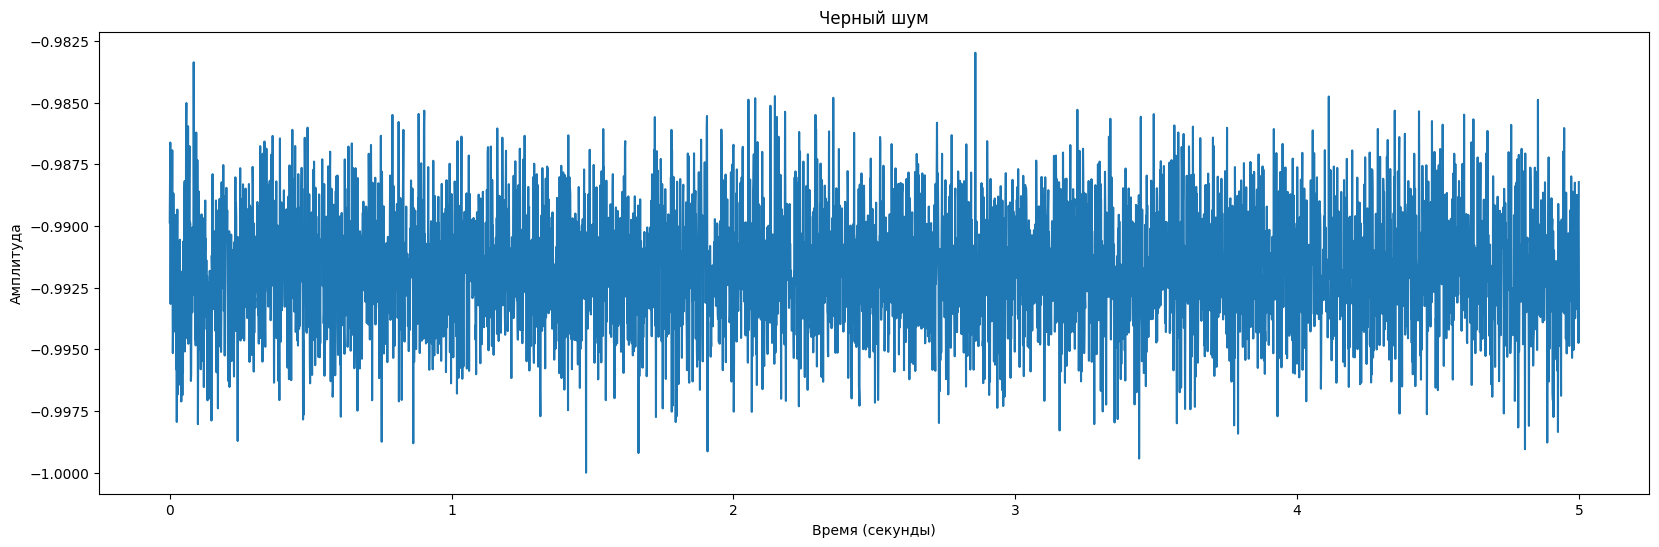

In [19]:
#визуализация
time_axis = np.linspace(0, duration, len(black_noise)) 
plt.figure(figsize=(20, 6))  
plt.plot(time_axis, black_noise)

plt.title('Черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.show()

In [20]:
# слушаем, что получилось
sd.play(black_noise, sample_rate)
sd.wait()

#2 Зашумление сингала

In [23]:
num_points = duration*sample_rate  # количество точек

time_points = np.linspace(0, duration, num_points)  # Создаем равномерные временные точки от 0 до 5 секунд

white_noise_base = np.random.normal(0,1,size=num_points)  # Генерим белый шум

values = 10*np.tan(4*time_points*np.pi) # вычисляем амплитуды сигнала по синусоидальному закону

values_noise = values + white_noise_base # зашумляем сигнал


C:\Users\User\AppData\Local\Temp\ipykernel_8836\4175816549.py:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c0, c1, c2],


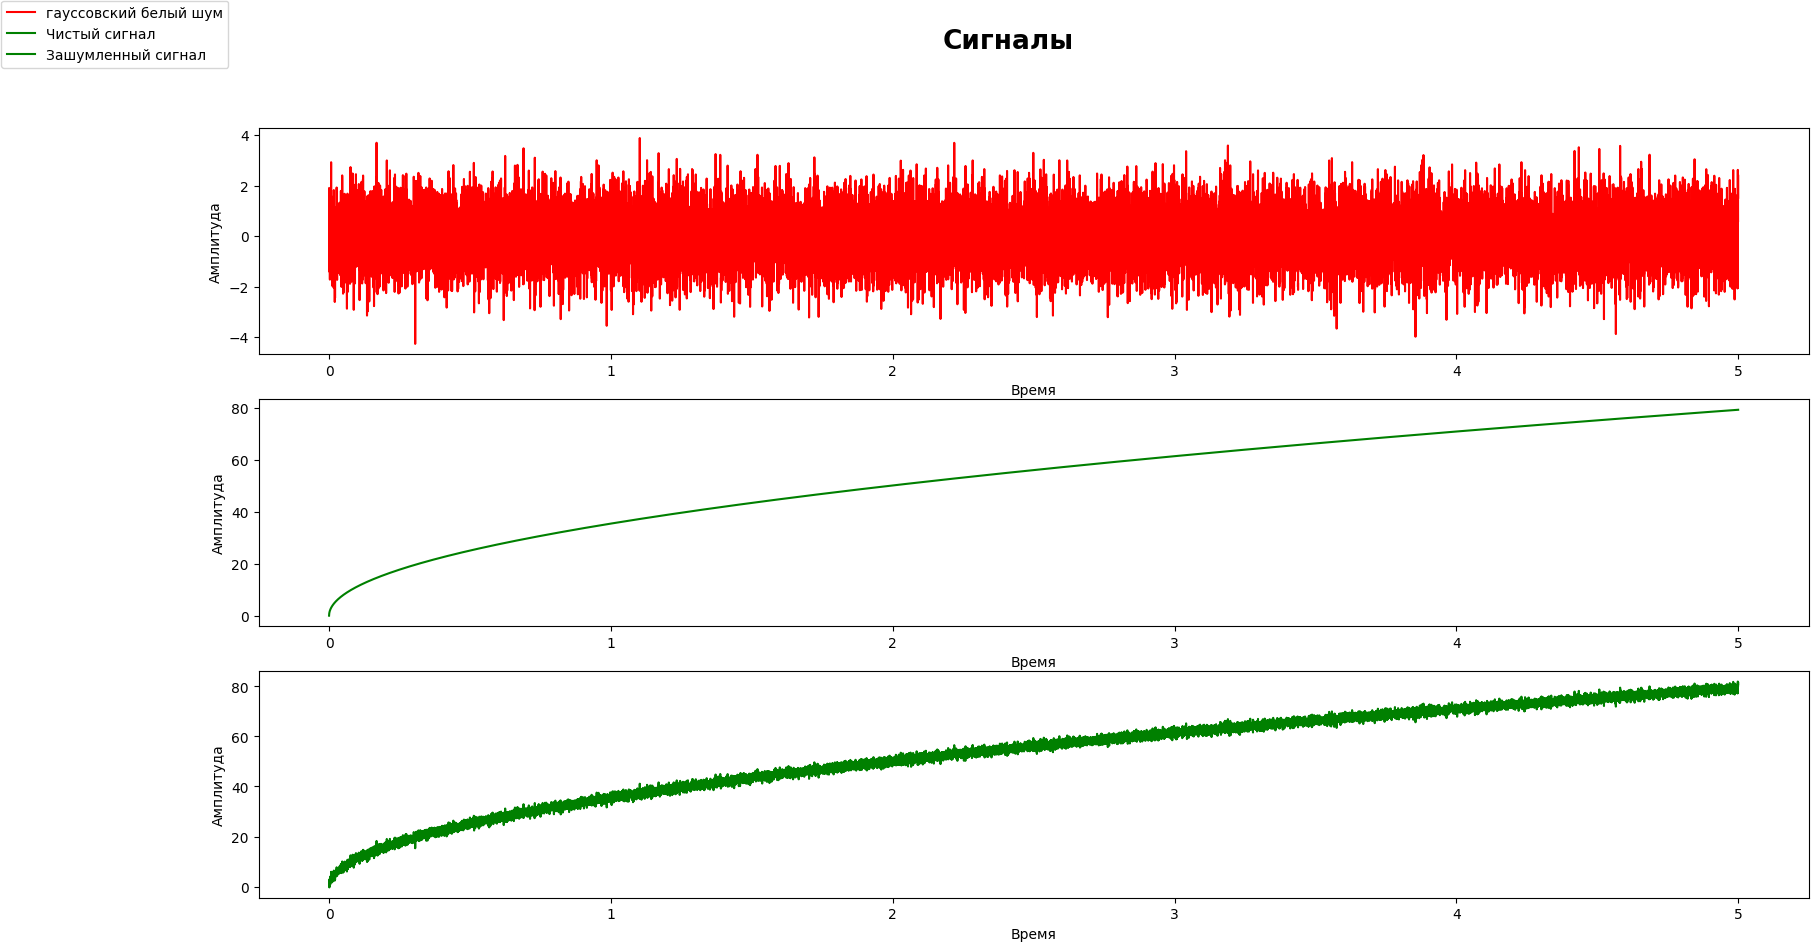

In [24]:
# Отрисовываем
# хотим нарисовать все на одном рисунке. Нам нужно 3 рисунка, один под другим.
fig, axs = plt.subplots(3, 1, figsize=(20, 10))


# общий заголовок для всей картинки
fig.suptitle('Сигналы', fontsize=19, fontweight='bold')

labels = ["гауссовский белый шум", "Чистый сигнал", "Зашумленный сигнал"]

# определяем, что будем отрисовывать на 1 графике. По x - время, по y - амплитуды
c0 = axs[0].plot(time_points, white_noise_base, color="red")
axs[0].set_xlabel('Время')
axs[0].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c1 = axs[1].plot(time_points, values, color="green")
axs[1].set_xlabel('Время')
axs[1].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c2 = axs[2].plot(time_points, values_noise, color="green")
axs[2].set_xlabel('Время')
axs[2].set_ylabel('Амплитуда')

# отрисовываем общую легенду
fig.legend([c0, c1, c2],
           labels=labels,
           loc='upper left',
           borderaxespad=0.1)